## 다중회귀 - 보스톤 주택 가격

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터셋 불러오기

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 단순 선형회귀

#### 산점도와 선형회귀선

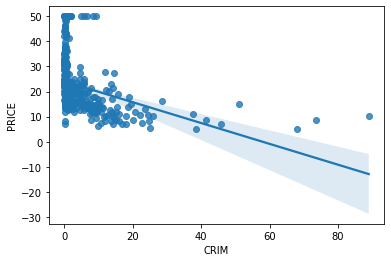

In [ ]:
sns.regplot(x='CRIM', y='PRICE', data=df);

In [ ]:
_, axs = plt.subplots(3, 4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

#### Feature 별 결정계수(R squared) 계산

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X= df[feature].values.reshape(-1,1)
    lr.fit(X, boston.target)
    score = lr.score(X, boston.target)
    print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


### 다중 선형회귀

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2022
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# R-squared
lr.score(X_train, y_train)

0.7444811414684593

In [ ]:
# 계수, weight
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [ ]:
# 절편, bias
lr.intercept_

30.950814924201126

- 회귀식
<pre>
y = -1.18 * CRIM + 4.72 * ZN + 4.93 * INDUS + 2.64*CHAS + ... -5.27 * LSTAT + 30.95

#### 테스트 데이터에 적용

In [ ]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]), 20.1)

In [ ]:
# weight와 bias를 이용하여 직접 계산하여 구한 값
np.dot(lr.coef_, X_test[0]) + lr.intercept_

(20.1, 21.227539118774818)

In [ ]:
# predict
lr.predict(X_test[0].reshape(1,-1))     # lr.predict(X_test[:-1])

array([21.22753912])

In [ ]:
# 10개의 테스트 데이터에 대해서 실제값과 직접 계산한값, 모델 예측값 비교
for i in range(10):
    pred1 = np.dot(lr.coef_, X_test[i]) + lr.intercept_
    pred2 = lr.predict(X_test[i].reshape(1,-1))
    print(f'실제값: {y_test[i]},\t직접계산 예측값: {pred1:.4f},\tLR 예측값: {pred2[0]:.4f}')

실제값: 20.1,	직접계산 예측값: 21.2275,	LR 예측값: 21.2275
실제값: 11.9,	직접계산 예측값: 7.0638,	LR 예측값: 7.0638
실제값: 20.6,	직접계산 예측값: 21.4743,	LR 예측값: 21.4743
실제값: 33.2,	직접계산 예측값: 35.7832,	LR 예측값: 35.7832
실제값: 20.8,	직접계산 예측값: 18.2366,	LR 예측값: 18.2366
실제값: 13.5,	직접계산 예측값: 13.4321,	LR 예측값: 13.4321
실제값: 24.7,	직접계산 예측값: 24.7007,	LR 예측값: 24.7007
실제값: 13.9,	직접계산 예측값: 13.0563,	LR 예측값: 13.0563
실제값: 10.4,	직접계산 예측값: 6.3579,	LR 예측값: 6.3579
실제값: 19.7,	직접계산 예측값: 13.6734,	LR 예측값: 13.6734


### 회귀는 꼭 선형회귀를 사용해야 하는가?
- LinearRegression, DecisionTree, SVM, RandomForest, XGBoost

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#### 1. LinearRegression

In [ ]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

In [ ]:
print(r2_lr, mse_lr)

0.6739859403280901 27.36719446205099


#### 2. DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2022)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [ ]:
pred_dt = dtr.predict(X_test)
r2_dt = r2_score(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)
print(r2_dt, mse_dt)

0.8359216453200391 13.773529411764708


#### 3. SVM

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv= mean_squared_error(y_test, pred_sv)
print(r2_sv, mse_sv)

0.2758473099781893 60.78887367001428


#### 4. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rtf = RandomForestRegressor(random_state=2022)
rtf.fit(X_train, y_train)
pred_rf = rtf.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
print(r2_rf, mse_rf)

0.817419113329868 15.326721294117627


#### 5. XGBoost

In [ ]:
from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=2022)
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg= mean_squared_error(y_test, pred_xg)
print(r2_xg, mse_xg)

[01:15:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8066612215665507 16.229790677642647


#### 6. 비교

In [ ]:
print('LR\tDT\tSVM\tRF\tXG')
print(f'{r2_lr:.4f}\t{r2_dt:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')
print(f'{mse_lr:.4f}\t{mse_dt:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

LR	DT	SVM	RF	XG
0.6740	0.8359	0.2758	0.8174	0.8067
27.3672	13.7735	60.7889	15.3267	16.2298


In [ ]:
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'DT':pred_dt, 'SVM':pred_sv, 'RF':pred_rf, 'XG':pred_xg
})
df.head()

,y_test,LR,DT,SVM,RF,XG
0,20.1,21.227539,19.3,20.644693,19.934,20.255072
1,11.9,7.063817,13.8,16.130347,12.616,17.174437
2,20.6,21.474262,20.6,17.155498,21.612,20.817535
3,33.2,35.783213,33.2,24.229946,35.803,33.393593
4,20.8,18.236587,21.9,15.514814,20.495,19.065611
